In [3]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_pokemon_data(limit):
    url = f"https://pokeapi.co/api/v2/pokemon?limit={limit}"
    response = requests.get(url)
    data = response.json()["results"]
    
    pokemon_data = []
    
    for pokemon in data:
        pokemon_url = pokemon["url"]
        pokemon_response = requests.get(pokemon_url)
        pokemon_info = pokemon_response.json()
        
        pokemon_data.append(pokemon_info)
        
    return pokemon_data

limit = 1009 #151 
pokemon_data = get_pokemon_data(limit)


In [92]:
data = []
    
for pokemon in pokemon_data:
    name = pokemon["name"]
    pokedex_num = pokemon["id"]
    base_experience = pokemon["base_experience"]
    stats = [stat["base_stat"] for stat in pokemon["stats"]]

    data.append([pokedex_num, name, base_experience] + stats)

columns = ["Pokedex", "Name", "Base Experience",, "HP", "Attack", "Defense", "Special Attack", "Special Defense", "Speed"]
all_pokemon = pd.DataFrame(data, columns=columns)


In [93]:
all_pokemon

,Pokedex,Name,Base Experience,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,1,bulbasaur,64.0,45,49,49,65,65,45
1,2,ivysaur,142.0,60,62,63,80,80,60
2,3,venusaur,263.0,80,82,83,100,100,80
3,4,charmander,62.0,39,52,43,60,50,65
4,5,charmeleon,142.0,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...
1004,1005,roaring-moon,NaN,105,139,71,55,101,119
1005,1006,iron-valiant,NaN,74,130,90,120,60,116
1006,1007,koraidon,NaN,100,135,115,85,100,135
1007,1008,miraidon,NaN,100,85,100,135,115,135


In [94]:
df = all_pokemon.dropna().set_index("Pokedex").drop(columns="Name")
df

,Base Experience,HP,Attack,Defense,Special Attack,Special Defense,Speed
Pokedex,,,,,,,
1,64.0,45,49,49,65,65,45
2,142.0,60,62,63,80,80,60
3,263.0,80,82,83,100,100,80
4,62.0,39,52,43,60,50,65
5,142.0,58,64,58,80,65,80
...,...,...,...,...,...,...,...
894,290.0,80,100,50,100,50,200
895,290.0,200,100,50,100,50,80
896,290.0,100,145,130,65,110,30


In [119]:
pokedex_pokemon_map = all_pokemon.set_index("Pokedex")["Name"].to_dict()

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ndata = scaler.fit_transform(df)
ndata

array([[-1.05010627, -0.91725187, -0.92901984, ..., -0.15947249,
        -0.18062653, -0.73661527],
       [-0.10545164, -0.34471328, -0.49055703, ...,  0.35149194,
         0.37498875, -0.20920296],
       [ 1.35997413,  0.4186715 ,  0.18400114, ...,  1.03277786,
         1.11580912,  0.49401344],
       ...,
       [ 1.68696996,  1.18205628,  2.30885937, ..., -0.15947249,
         1.4862193 , -1.26402757],
       [ 1.68696996,  1.18205628, -0.3893733 , ...,  2.56567118,
         0.37498875,  2.25205444],
       [ 1.20253169,  1.18205628,  0.11654532, ...,  0.35149194,
         0.37498875,  0.49401344]])

In [96]:
ndf = pd.DataFrame(ndata, columns=df.columns, index=df.index)
ndf

,Base Experience,HP,Attack,Defense,Special Attack,Special Defense,Speed
Pokedex,,,,,,,
1,-1.050106,-0.917252,-0.929020,-0.775292,-0.159472,-0.180627,-0.736615
2,-0.105452,-0.344713,-0.490557,-0.301033,0.351492,0.374989,-0.209203
3,1.359974,0.418671,0.184001,0.376480,1.032778,1.115809,0.494013
4,-1.074328,-1.146267,-0.827836,-0.978546,-0.329794,-0.736242,-0.033399
5,-0.105452,-0.421052,-0.423101,-0.470411,0.351492,-0.180627,0.494013
...,...,...,...,...,...,...,...
894,1.686970,0.418671,0.791103,-0.741416,1.032778,-0.736242,4.713312
895,1.686970,4.998980,0.791103,-0.741416,1.032778,-0.736242,0.494013
896,1.686970,1.182056,2.308859,1.968635,-0.159472,1.486219,-1.264028


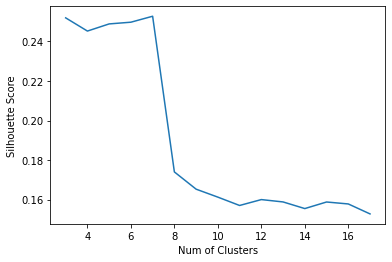

In [106]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
k_values = []
for k in range(3, 18):
    labels = KMeans(n_clusters=k, n_init=10).fit_predict(ndata)
    score = silhouette_score(ndata, labels)
    scores.append(score)
    k_values.append(k)
plt.plot(k_values, scores)
plt.xlabel("Num of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [111]:
k = 7
kmeans = KMeans(n_clusters=k, n_init=10)
clusters = kmeans.fit_predict(ndata)

ndf["Cluster"] = clusters
ndf

,Base Experience,HP,Attack,Defense,Special Attack,Special Defense,Speed,Cluster
Pokedex,,,,,,,,
1,-1.050106,-0.917252,-0.929020,-0.775292,-0.159472,-0.180627,-0.736615,1
2,-0.105452,-0.344713,-0.490557,-0.301033,0.351492,0.374989,-0.209203,2
3,1.359974,0.418671,0.184001,0.376480,1.032778,1.115809,0.494013,6
4,-1.074328,-1.146267,-0.827836,-0.978546,-0.329794,-0.736242,-0.033399,1
5,-0.105452,-0.421052,-0.423101,-0.470411,0.351492,-0.180627,0.494013,5
...,...,...,...,...,...,...,...,...
894,1.686970,0.418671,0.791103,-0.741416,1.032778,-0.736242,4.713312,6
895,1.686970,4.998980,0.791103,-0.741416,1.032778,-0.736242,0.494013,4
896,1.686970,1.182056,2.308859,1.968635,-0.159472,1.486219,-1.264028,3


In [112]:
ndf["Cluster"].value_counts()

1    321
5    159
3    135
2    117
6    104
0     49
4     13
Name: Cluster, dtype: int64

In [116]:
ndf['Cluster'] = clusters

for cluster, pokemon_group in ndf.groupby("Cluster"):
    print("Cluster:", cluster, "Size:", pokemon_group.shape[0])
    
    for pokedex_num in pokemon_group.sample(10).index:
        print("\t", pokedex_num, pokedex_pokemon_map[pokedex_num])


Cluster: 0 Size: 49
	 205 forretress
	 768 golisopod
	 410 shieldon
	 375 metang
	 477 dusknoir
	 748 toxapex
	 95 onix
	 790 cosmoem
	 558 crustle
	 306 aggron
Cluster: 1 Size: 321
	 551 sandile
	 808 meltan
	 433 chingling
	 280 ralts
	 174 igglybuff
	 194 wooper
	 129 magikarp
	 165 ledyba
	 633 deino
	 175 togepi
Cluster: 2 Size: 117
	 176 togetic
	 350 milotic
	 730 primarina
	 576 gothitelle
	 45 vileplume
	 192 sunflora
	 631 heatmor
	 518 musharna
	 866 mr-rime
	 606 beheeyem
Cluster: 3 Size: 135
	 107 hitmonchan
	 141 kabutops
	 127 pinsir
	 372 shelgon
	 625 bisharp
	 62 poliwrath
	 781 dhelmise
	 465 tangrowth
	 612 haxorus
	 241 miltank
Cluster: 4 Size: 13
	 297 hariyama
	 143 snorlax
	 799 guzzlord
	 321 wailord
	 594 alomomola
	 40 wigglytuff
	 895 regidrago
	 320 wailmer
	 446 munchlax
	 113 chansey
Cluster: 5 Size: 159
	 83 farfetchd
	 547 whimsicott
	 61 poliwhirl
	 571 zoroark
	 764 comfey
	 198 murkrow
	 101 electrode
	 469 yanmega
	 666 vivillon
	 496 servine
Cluste

In [117]:
cluster_summary = ndf.groupby('Cluster').mean()
cluster_summary

,Base Experience,HP,Attack,Defense,Special Attack,Special Defense,Speed
Cluster,,,,,,,
0,0.254911,-0.385998,0.134442,2.212678,-0.414607,1.040971,-0.970542
1,-1.026790,-0.753517,-0.778978,-0.724637,-0.775707,-0.820478,-0.598491
2,0.357767,0.447380,-0.272046,0.314809,0.793745,0.910975,-0.343235
3,0.505927,0.601601,1.203084,0.612857,-0.140043,0.057808,-0.035743
4,0.962176,4.153385,-0.119550,-0.897765,-0.120168,-0.066654,-0.544583
5,0.100663,-0.096493,0.065211,-0.298263,0.299860,-0.013127,1.034473
6,1.715733,0.851746,1.000606,0.612632,1.434999,0.970494,1.223600
